In [1]:
#Notebook for model 7
# decided to do this one once a semi understanding of how to manipluate and extract data from the relatively smaller data sets first 
# Will aim to implement the knowledge from preivous notebooks here 
# Aimning to extrapolate all the info and create and replecate similar procedures 
# updated work load 


# Will add this into a new notebook Sept 21st onwards 
"""
no lasso based regression
S12 -17 
S12 -> List of Genes of Patients(Column A) Patients B01 ->B03
s13 -> list of Bacteria for these patients 

Integrating s13 and s12, looking through healthy and tumor 
Dataframe where the information bacteria and gene 
out is the gene
input is the bacteria 

is it predictable from the gene MAIN TASK

Each one of S12 is  18000 outcomes, input is the task based (bacterial side)
s13 -> how much of each is thee
Abundance of each bacteria 

Type of tree and then second level 
(clustering of these) somehow the feature is the gene, check API handling (each bacteria has 5000 genes) 

Refer to supp table 1 

S6 refers to the CRC principles 
pull in data from the database (clustering, based upon the level then re cluster based upon the gene)

Skip the mapping for the Gene side, but keep the bacterial side  

    
"""

'\nno lasso based regression\nS12 -17 \nS12 -> List of Genes of Patients(Column A) Patients B01 ->B03\ns13 -> list of Bacteria for these patients \n\nIntegrating s13 and s12, looking through healthy and tumor \nDataframe where the information bacteria and gene \nout is the gene\ninput is the bacteria \n\nis it predictable from the gene MAIN TASK\n\nEach one of S12 is  18000 outcomes, input is the task based (bacterial side)\ns13 -> how much of each is thee\nAbundance of each bacteria \n\nType of tree and then second level \n(clustering of these) somehow the feature is the gene, check API handling (each bacteria has 5000 genes) \n\nRefer to supp table 1 \n\nS6 refers to the CRC principles \npull in data from the database (clustering, based upon the level then re cluster based upon the gene)\n\nSkip the mapping for the Gene side, but keep the bacterial side  \n\n    \n'

In [2]:
#Import statements

# refer to documentation(WorkFlow)
# to understand why each library is used and what purpose(s)
# library update(s) 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

#need to verify model implementation 

from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import mantel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
# Load CSV file into Dataframe
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
df = pd.read_csv(csvfilePath)

second_column_name = df.columns[1]
second_column = df[second_column_name]

# Sort the column
sorted_column = second_column.sort_values()

# Find and print matching values
matching_values = sorted_column[sorted_column.duplicated(keep = False)]

print("Matching values in the second column")
print(matching_values)
print("Column names:")
print(df.columns)

Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtype: object
Column names:
Index(['Table S7: Significant and stability-selected host gene-microbe associations at FDR < 0.1 for IBD data',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype=

In [4]:
set1 = matching_values[matching_values.str.contains("Actinobacteria")]
set2 = matching_values[matching_values.str.contains("Betaproteobacteria")]

# Check for continous data 
X_column = 'Unnamed: 2'  
Y_column = 'Unnamed: 3'  


# Perform regression on Set 1
set1_indices = set1.index
X_set1 = df.loc[set1_indices, [X_column]].values
Y_set1 = df.loc[set1_indices, Y_column].values

regressor1 = LinearRegression()
regressor1.fit(X_set1, Y_set1)
print("Regression coefficients for Set 1:", regressor1.coef_)
print("Intercept for Set 1:", regressor1.intercept_)

# Perform regression on Set 2
set2_indices = set2.index
X_set2 = df.loc[set2_indices, [X_column]].values
Y_set2 = df.loc[set2_indices, Y_column].values

regressor2 = LinearRegression()
regressor2.fit(X_set2, Y_set2)
print("Regression coefficients for Set 2:", regressor2.coef_)
print("Intercept for Set 2:", regressor2.intercept_)

Regression coefficients for Set 1: [0.96757243]
Intercept for Set 1: -0.04051956538299595
Regression coefficients for Set 2: [0.97940598]
Intercept for Set 2: -0.047394300437324455


Column names:
Index(['Table S7: Significant and stability-selected host gene-microbe associations at FDR < 0.1 for IBD data',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtyp

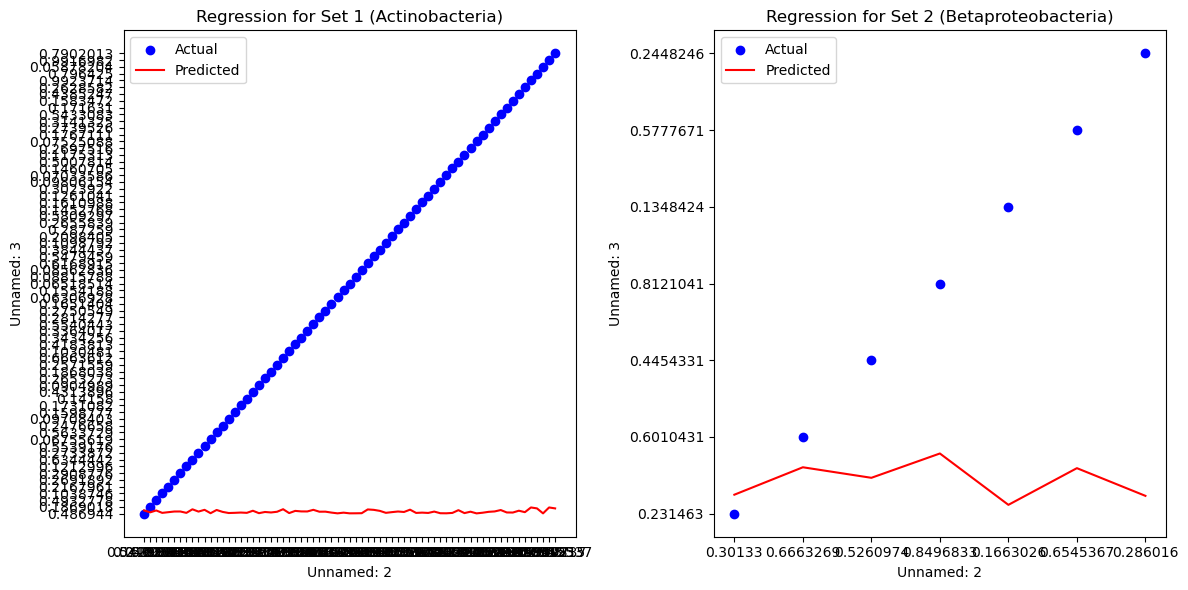

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load CSV file into DataFrame
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
df = pd.read_csv(csvfilePath)

# Print column names
print("Column names:")
print(df.columns)

# Step 2: Extract the second column
second_column_name = df.columns[1]
second_column = df[second_column_name]

# Step 3: Sort and find matching values in the second column
sorted_column = second_column.sort_values()
matching_values = sorted_column[sorted_column.duplicated(keep=False)]

print("Matching values in the second column")
print(matching_values)

# Step 4: Identify and separate different matching sets
set1 = matching_values[matching_values.str.contains("Actinobacteria")]
set2 = matching_values[matching_values.str.contains("Betaproteobacteria")]

# Ensure you have continuous data for regression
# Replace 'Unnamed: 2' and 'Unnamed: 3' with actual column names for independent and dependent variables
X_column = 'Unnamed: 2'  # Replace with actual column name for independent variable
Y_column = 'Unnamed: 3'  # Replace with actual column name for dependent variable

# Step 5: Perform regression on each set separately

# Perform regression on Set 1
set1_indices = set1.index
X_set1 = df.loc[set1_indices, [X_column]].values
Y_set1 = df.loc[set1_indices, Y_column].values

regressor1 = LinearRegression()
regressor1.fit(X_set1, Y_set1)
Y_set1_pred = regressor1.predict(X_set1)

# Perform regression on Set 2
set2_indices = set2.index
X_set2 = df.loc[set2_indices, [X_column]].values
Y_set2 = df.loc[set2_indices, Y_column].values

regressor2 = LinearRegression()
regressor2.fit(X_set2, Y_set2)
Y_set2_pred = regressor2.predict(X_set2)

# Step 6: Plot the results

# Plot for Set 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set1.ravel(), Y_set1, color='blue', label='Actual')  # Use ravel() to flatten the array
plt.plot(X_set1.ravel(), Y_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria)')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()

# Plot for Set 2
plt.subplot(1, 2, 2)
plt.scatter(X_set2.ravel(), Y_set2, color='blue', label='Actual')  # Use ravel() to flatten the array
plt.plot(X_set2.ravel(), Y_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria)')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()

plt.tight_layout()
plt.show()



Need to add in markdown cells for every graph 

Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtype: object


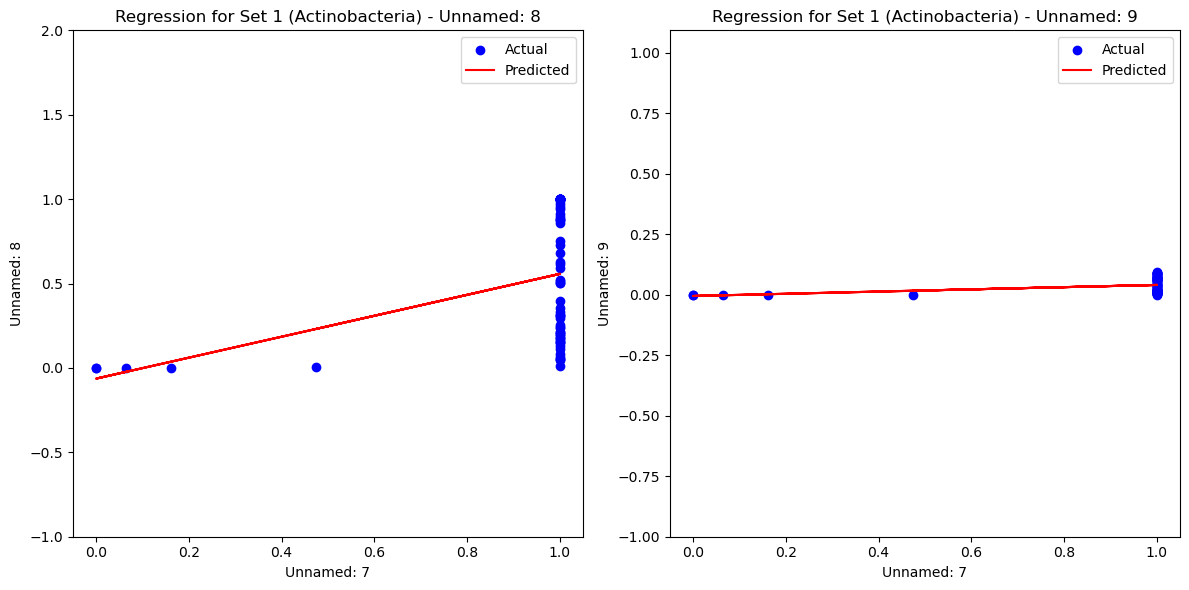

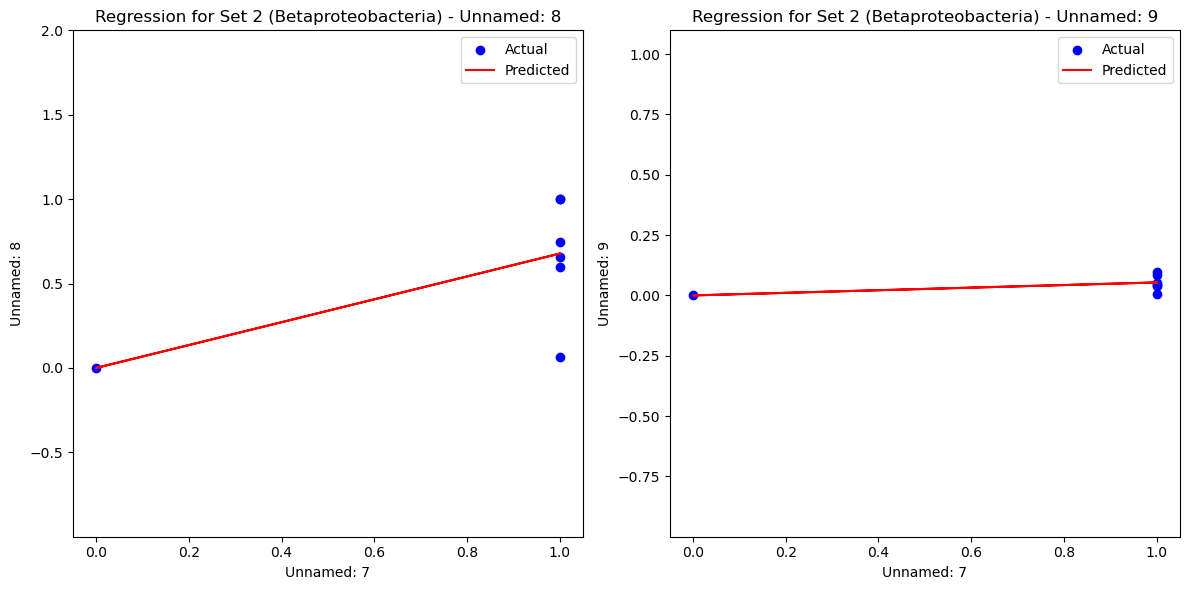

In [6]:
print("Matching values in the second column")
print(matching_values)

# Step 4: Identify and separate different matching sets
set1_indices = matching_values[matching_values.str.contains("Actinobacteria")].index
set2_indices = matching_values[matching_values.str.contains("Betaproteobacteria")].index

# Extract data for Actinobacteria (Set 1)
X_set1 = df.loc[set1_indices, 'Unnamed: 7'].astype(float).values.reshape(-1, 1)
Y1_set1 = df.loc[set1_indices, 'Unnamed: 8'].astype(float).values.reshape(-1, 1)
Y2_set1 = df.loc[set1_indices, 'Unnamed: 9'].astype(float).values.reshape(-1, 1)

# Extract data for Betaproteobacteria (Set 2)
X_set2 = df.loc[set2_indices, 'Unnamed: 7'].astype(float).values.reshape(-1, 1)
Y1_set2 = df.loc[set2_indices, 'Unnamed: 8'].astype(float).values.reshape(-1, 1)
Y2_set2 = df.loc[set2_indices, 'Unnamed: 9'].astype(float).values.reshape(-1, 1)

# Flatten the arrays for plotting
X_set1_flat = X_set1.flatten()
Y1_set1_flat = Y1_set1.flatten()
Y2_set1_flat = Y2_set1.flatten()

X_set2_flat = X_set2.flatten()
Y1_set2_flat = Y1_set2.flatten()
Y2_set2_flat = Y2_set2.flatten()

# Perform linear regression on Set 1 (Actinobacteria)
regressor1_1 = LinearRegression()
regressor1_1.fit(X_set1, Y1_set1)
Y1_set1_pred = regressor1_1.predict(X_set1)

regressor1_2 = LinearRegression()
regressor1_2.fit(X_set1, Y2_set1)
Y2_set1_pred = regressor1_2.predict(X_set1)

# Perform linear regression on Set 2 (Betaproteobacteria)
regressor2_1 = LinearRegression()
regressor2_1.fit(X_set2, Y1_set2)
Y1_set2_pred = regressor2_1.predict(X_set2)

regressor2_2 = LinearRegression()
regressor2_2.fit(X_set2, Y2_set2)
Y2_set2_pred = regressor2_2.predict(X_set2)

# Step 6: Plot the results

# Plot for Set 1 (Actinobacteria)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set1_flat, Y1_set1_flat, color='blue', label='Actual')
plt.plot(X_set1_flat, Y1_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria) - Unnamed: 8')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 8')
plt.legend()
plt.ylim(min(Y1_set1_flat) - 1, max(Y1_set1_flat) + 1)  # Spread out the y-axis

plt.subplot(1, 2, 2)
plt.scatter(X_set1_flat, Y2_set1_flat, color='blue', label='Actual')
plt.plot(X_set1_flat, Y2_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria) - Unnamed: 9')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 9')
plt.legend()
plt.ylim(min(Y2_set1_flat) - 1, max(Y2_set1_flat) + 1)  # Spread out the y-axis

plt.tight_layout()
plt.show()

# Plot for Set 2 (Betaproteobacteria)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set2_flat, Y1_set2_flat, color='blue', label='Actual')
plt.plot(X_set2_flat, Y1_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria) - Unnamed: 8')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 8')
plt.legend()
plt.ylim(min(Y1_set2_flat) - 1, max(Y1_set2_flat) + 1)  # Spread out the y-axis

plt.subplot(1, 2, 2)
plt.scatter(X_set2_flat, Y2_set2_flat, color='blue', label='Actual')
plt.plot(X_set2_flat, Y2_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria) - Unnamed: 9')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 9')
plt.legend()
plt.ylim(min(Y2_set2_flat) - 1, max(Y2_set2_flat) + 1)  # Spread out the y-axis

plt.tight_layout()
plt.show()
 

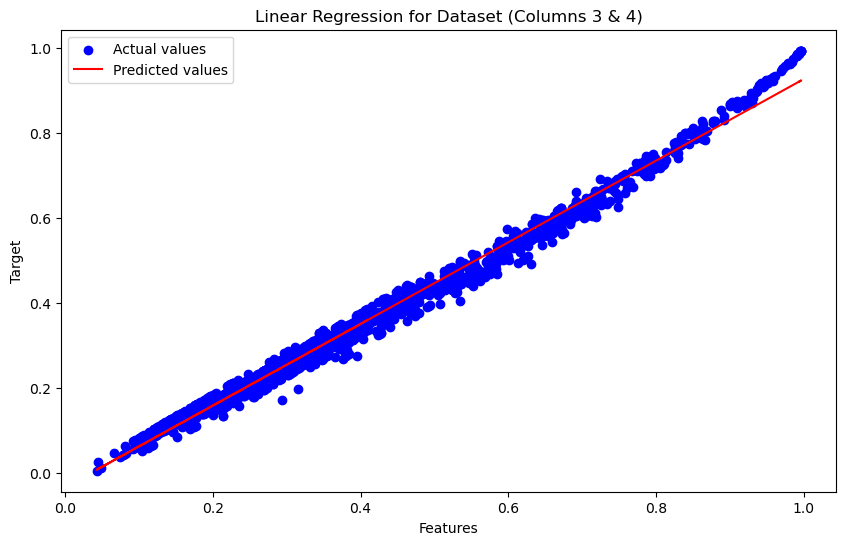

In [7]:
columns_of_interest = [df.columns[2], df.columns[3]]
filtered_df = df[columns_of_interest]

# Convert to numeric and drop NaN values
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Define X and Y correctly
X = filtered_df[filtered_df.columns[:-1]].values
Y = filtered_df[filtered_df.columns[-1]].values 

# Regressor model
regressor_model = LinearRegression()
regressor_model.fit(X, Y)
y_preds = regressor_model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_preds, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 3 & 4)')
plt.legend()
plt.show()




In [8]:
# Define the analysis function
def linear_analysis(X, Y, y_preds, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_preds)    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_analysis(X, Y, y_preds, 'Linear Regression for Columns 2 & 3')



Linear Regression for Columns 2 & 3 - R-squared: 0.99


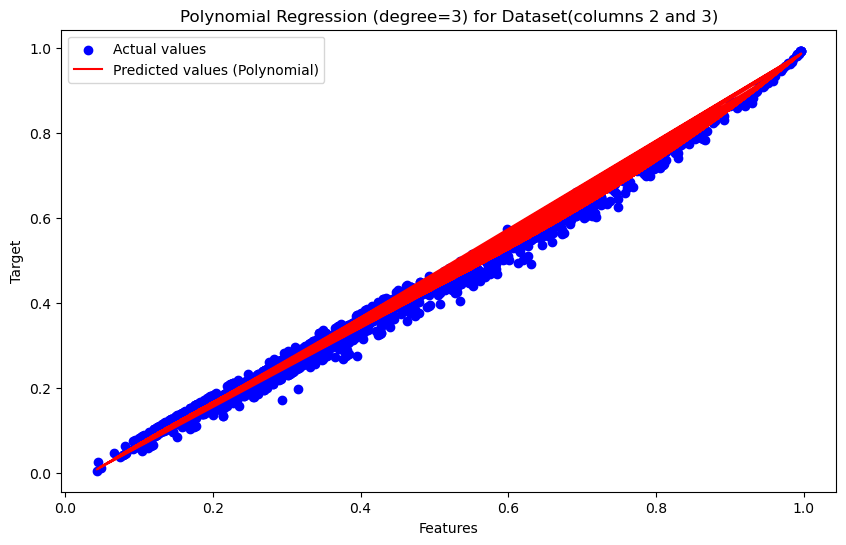

Polynomial Regression (degree=3) - R-squared: 0.99


In [9]:
# Prepare the data for polynomial regression

# Transform the features to polynomial features
degree = 3  # You can change the degree to a higher value if needed
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Create and fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, Y)
y_poly_pred = poly_regressor.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual values')
plt.plot(X, y_poly_pred, color='red', label='Predicted values (Polynomial)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title(f'Polynomial Regression (degree={degree}) for Dataset(columns 2 and 3)')
plt.legend()
plt.show()

# Evaluate the model
r_squared_poly = r2_score(Y, y_poly_pred)
mse_poly = mean_squared_error(Y, y_poly_pred)

print(f"Polynomial Regression (degree={degree}) - R-squared: {r_squared_poly:.2f}")


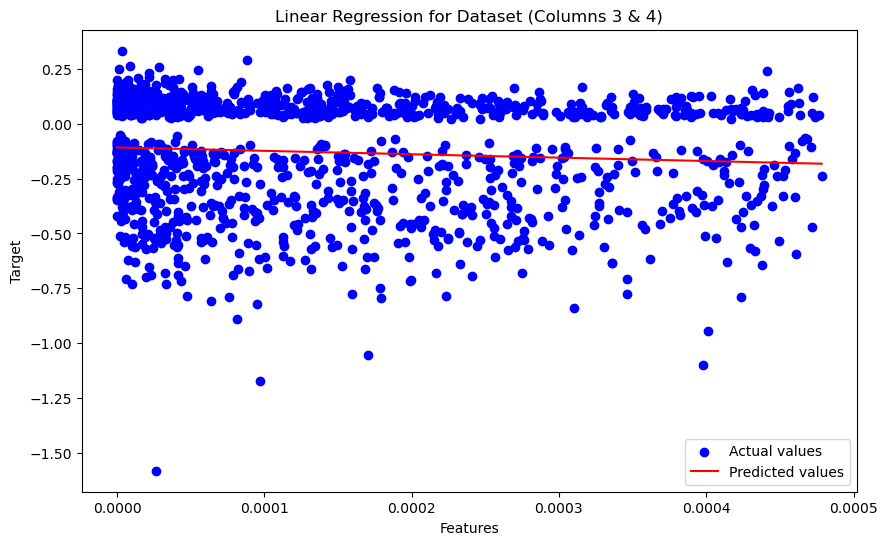

In [10]:
columns_of_interest = [df.columns[4], df.columns[5]]
filtered_df = df[columns_of_interest]

# Convert to numeric and drop NaN values
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Define X and Y correctly
X = filtered_df[filtered_df.columns[:-1]].values
Y = filtered_df[filtered_df.columns[-1]].values 

# Regressor model
regressor_model = LinearRegression()
regressor_model.fit(X, Y)
y_preds = regressor_model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_preds, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 3 & 4)')
plt.legend()
plt.show()




In [11]:
def linear_analysis(X, Y, y_preds, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_preds)    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_analysis(X, Y, y_preds, 'Linear Regression for Columns 2 & 3')



Linear Regression for Columns 2 & 3 - R-squared: 0.01


                         QuantReg Regression Results                          
Dep. Variable:             Unnamed: 3   Pseudo R-squared:               0.9041
Model:                       QuantReg   Bandwidth:                    0.008254
Method:                 Least Squares   Sparsity:                      0.04406
Date:                Tue, 24 Sep 2024   No. Observations:                 1295
Time:                        06:30:13   Df Residuals:                     1293
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0246      0.001    -18.695      0.000      -0.027      -0.022
Unnamed: 2     0.9440      0.003    341.776      0.000       0.939       0.949


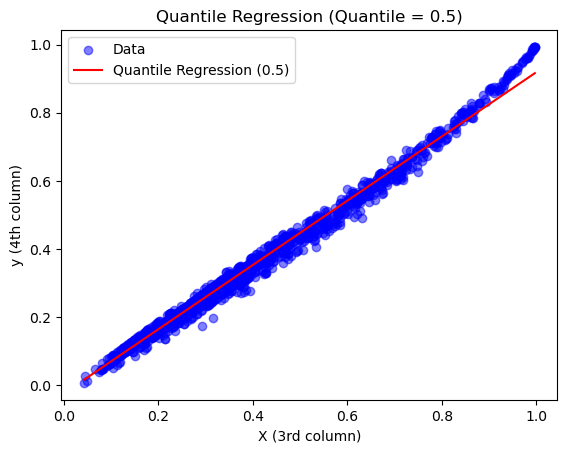

In [12]:
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
data = pd.read_csv(csvfilePath)

X = data.iloc[:, 2] 
y = data.iloc[:, 3]  

X = pd.to_numeric(X, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

data_clean = pd.concat([X, y], axis=1).dropna()

X_clean = data_clean.iloc[:, 0]
y_clean = data_clean.iloc[:, 1]

X_clean = sm.add_constant(X_clean)

quantile = 0.5
model = sm.QuantReg(y_clean, X_clean)
res = model.fit(q=quantile)

# Print the summary of the model
print(res.summary())


plt.scatter(X_clean.iloc[:, 1], y_clean, color='blue', alpha=0.5, label='Data')

X_fit = np.linspace(X_clean.iloc[:, 1].min(), X_clean.iloc[:, 1].max(), 100)
X_fit_with_const = sm.add_constant(X_fit)
y_fit = res.predict(X_fit_with_const)

plt.plot(X_fit, y_fit, color='red', label='Quantile Regression (0.5)')

plt.xlabel('X (3rd column)')
plt.ylabel('y (4th column)')
plt.title('Quantile Regression (Quantile = 0.5)')
plt.legend()

plt.show()


                         QuantReg Regression Results                          
Dep. Variable:             Unnamed: 5   Pseudo R-squared:             0.001302
Model:                       QuantReg   Bandwidth:                      0.1139
Method:                 Least Squares   Sparsity:                        1.298
Date:                Tue, 24 Sep 2024   No. Observations:                 1295
Time:                        06:30:13   Df Residuals:                     1293
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0796      0.026     -3.050      0.002      -0.131      -0.028
Unnamed: 4  -109.0296    131.475     -0.829      0.407    -366.958     148.899

The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


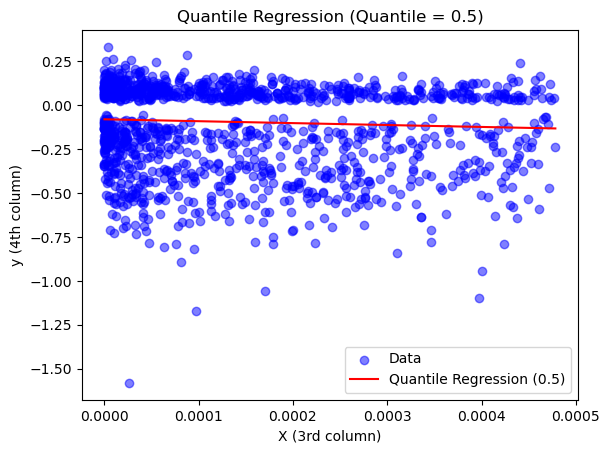

In [13]:
X = data.iloc[:, 4]  
y = data.iloc[:, 5]  

X = pd.to_numeric(X, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

data_clean = pd.concat([X, y], axis=1).dropna()

X_clean = data_clean.iloc[:, 0]
y_clean = data_clean.iloc[:, 1]

X_clean = sm.add_constant(X_clean)

quantile = 0.5
model = sm.QuantReg(y_clean, X_clean)
res = model.fit(q=quantile)

print(res.summary())

plt.scatter(X_clean.iloc[:, 1], y_clean, color='blue', alpha=0.5, label='Data')

X_fit = np.linspace(X_clean.iloc[:, 1].min(), X_clean.iloc[:, 1].max(), 100)
X_fit_with_const = sm.add_constant(X_fit)
y_fit = res.predict(X_fit_with_const)

plt.plot(X_fit, y_fit, color='red', label='Quantile Regression (0.5)')

plt.xlabel('X (3rd column)')
plt.ylabel('y (4th column)')
plt.title('Quantile Regression (Quantile = 0.5)')
plt.legend()
plt.show()



In [14]:
# renaming columns to help with EDA since 7th supplementary
# are not labeled/perfect 

# Convert to Markdown Cells
# For every comment cells 

Correlation Matrix:
                                                    Table S7: Significant and stability-selected host gene-microbe associations at FDR < 0.1 for IBD data  \
Table S7: Significant and stability-selected ho...                                                NaN                                                       
Unnamed: 1                                                                                        NaN                                                       
Unnamed: 2                                                                                        NaN                                                       
Unnamed: 3                                                                                        NaN                                                       
Unnamed: 4                                                                                        NaN                                                       
Unnamed: 5                            

/Users/schoudhry/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/schoudhry/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


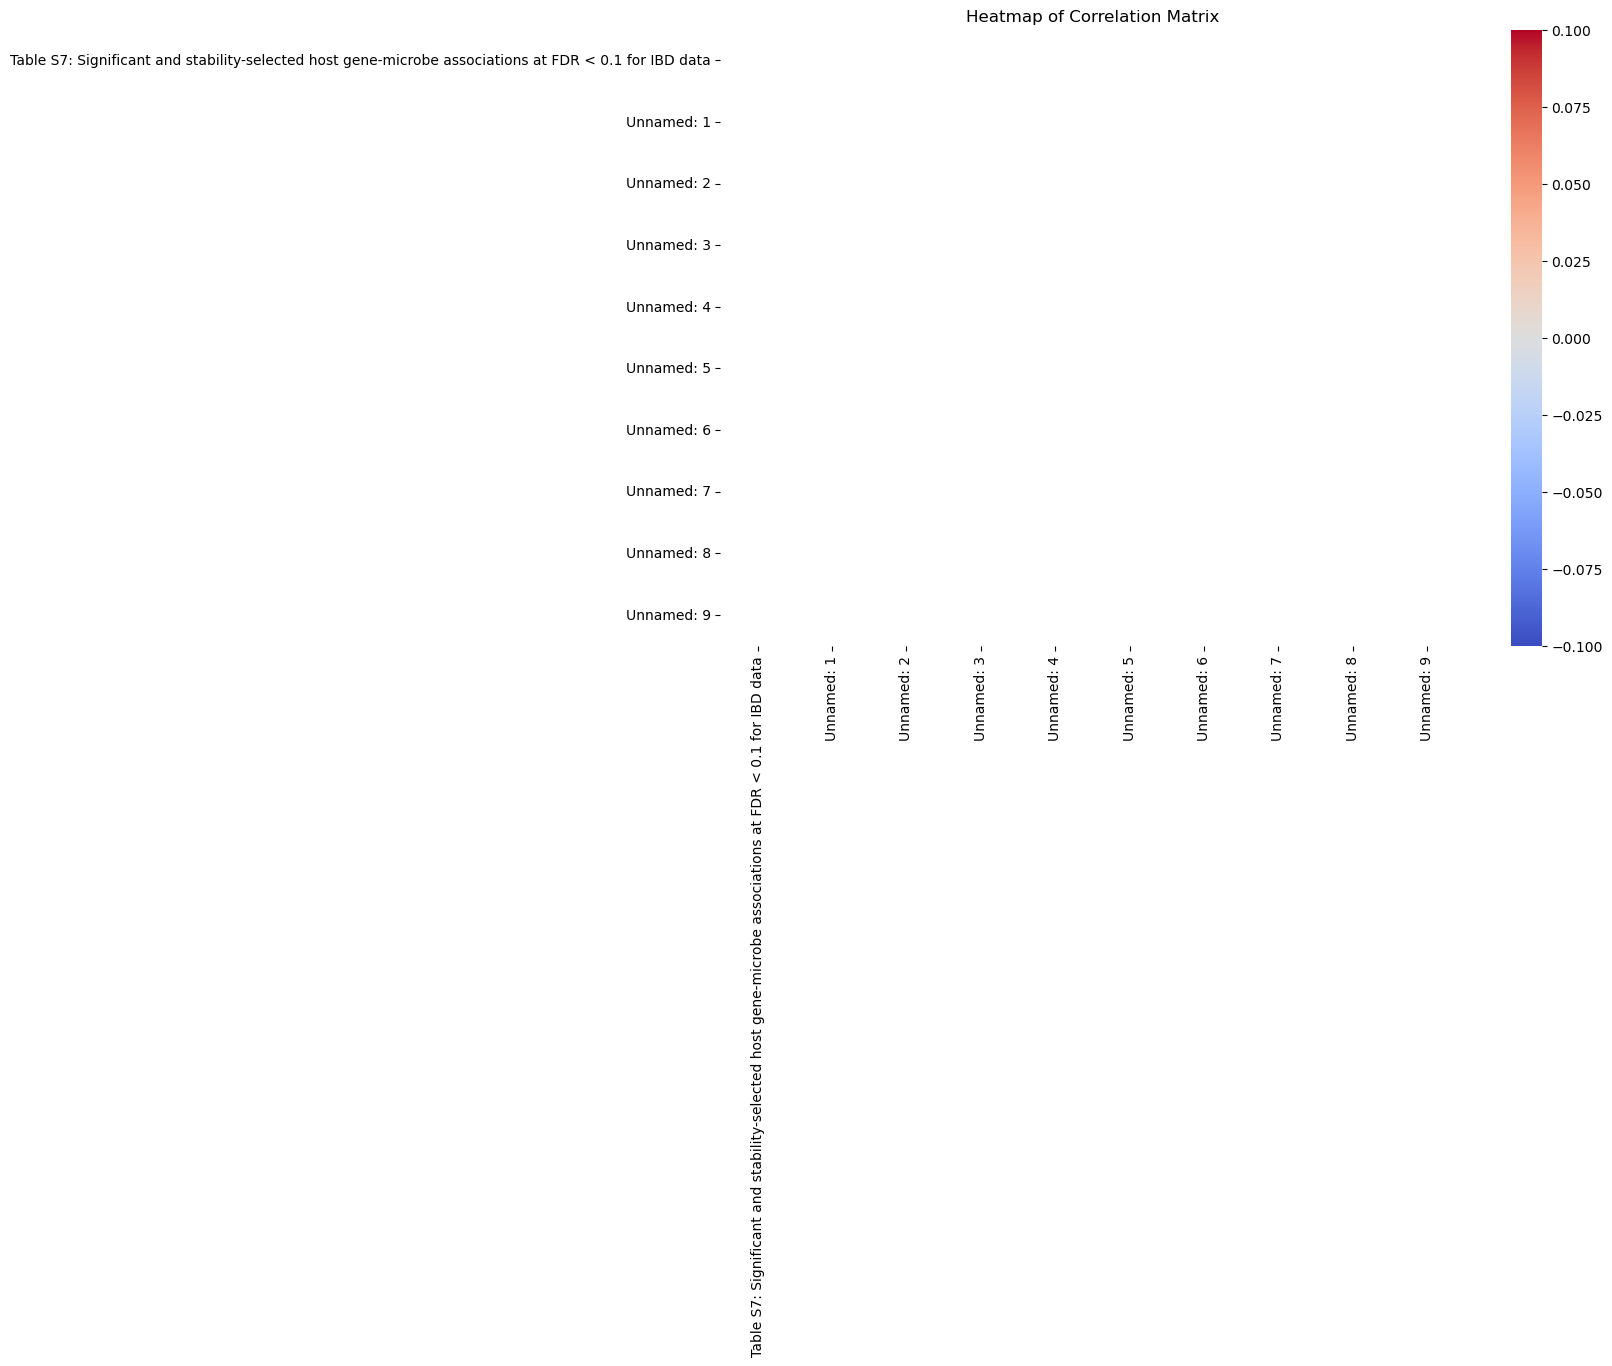

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
data = pd.read_csv(csvfilePath)

# Drop missing or null values
data_clean = data.dropna()

# Ensure all data is numeric and drop any remaining NaNs after coercion
data_clean = data_clean.apply(pd.to_numeric, errors='coerce')
data_clean = data_clean.dropna()

# Compute the correlation matrix
corr_matrix = data_clean.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# need to see why the heatmap will not pick up correlational values 

Unable to work through this issue 

Correlation Matrix for Columns 3 to 9:
            Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
Unnamed: 2    1.000000    0.995069   -0.351366    0.153951   -0.056017   
Unnamed: 3    0.995069    1.000000   -0.361967    0.150109   -0.057811   
Unnamed: 4   -0.351366   -0.361967    1.000000   -0.084055   -0.019651   
Unnamed: 5    0.153951    0.150109   -0.084055    1.000000    0.893841   
Unnamed: 6   -0.056017   -0.057811   -0.019651    0.893841    1.000000   
Unnamed: 7   -0.488409   -0.519730    0.242649   -0.079578    0.026010   
Unnamed: 8   -0.431044   -0.443889    0.937210   -0.112319   -0.028316   

            Unnamed: 7  Unnamed: 8  
Unnamed: 2   -0.488409   -0.431044  
Unnamed: 3   -0.519730   -0.443889  
Unnamed: 4    0.242649    0.937210  
Unnamed: 5   -0.079578   -0.112319  
Unnamed: 6    0.026010   -0.028316  
Unnamed: 7    1.000000    0.326316  
Unnamed: 8    0.326316    1.000000  


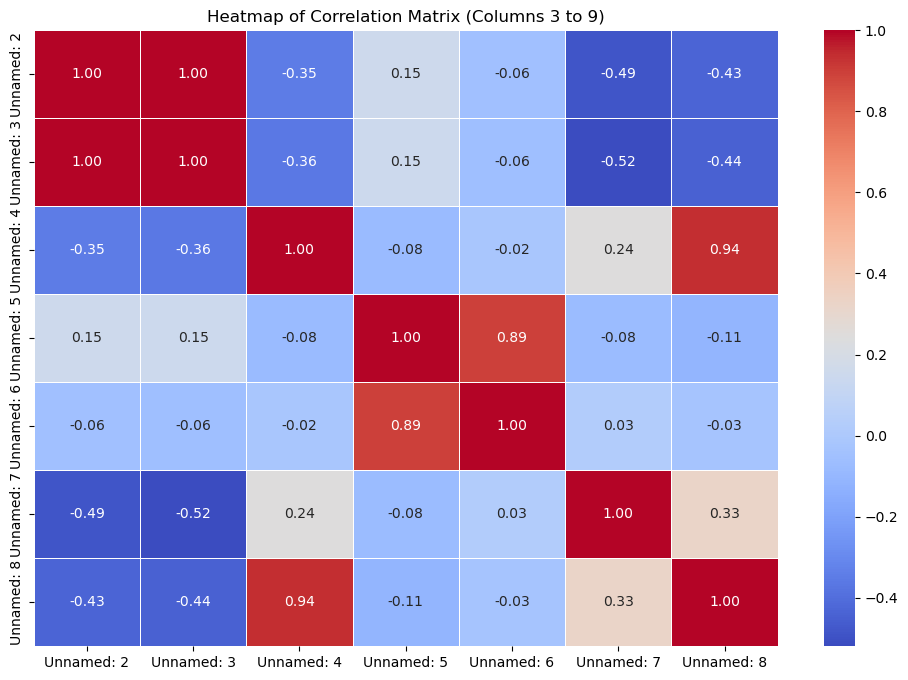

In [16]:
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
data = pd.read_csv(csvfilePath)

# Drop missing or null values
data_clean = data.dropna()

# Ensure columns 3 to 9 are numeric and handle any non-convertible values
selected_columns = data_clean.iloc[:, 2:9].apply(pd.to_numeric, errors='coerce')

# Drop rows where there are NaN values after conversion
selected_columns = selected_columns.dropna()

# Correlation matrix
corr_matrix = selected_columns.corr()

# Display the correlation matrix
print("Correlation Matrix for Columns 3 to 9:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Columns 3 to 9)')
plt.show()

# need to verify the correlation of the matix and explain 


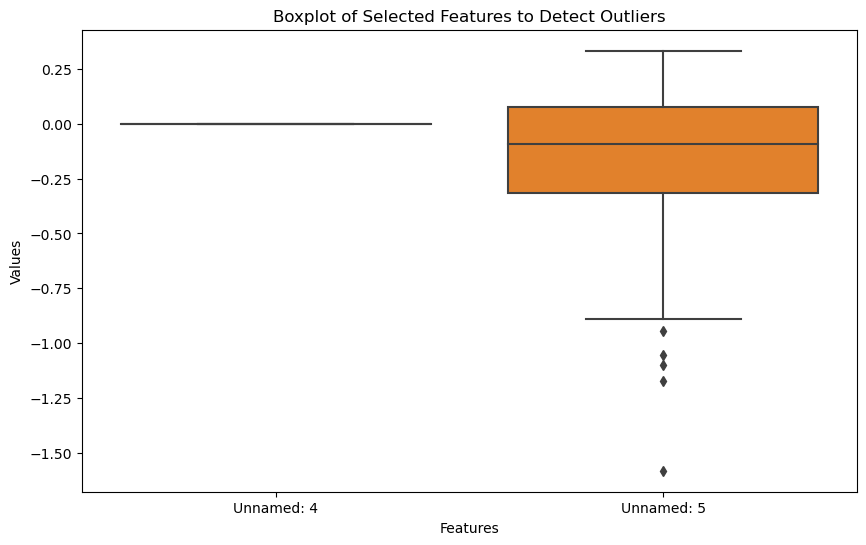

Outliers in X (column 4):
Series([], Name: Unnamed: 4, dtype: float64)
Outliers in y (column 5):
344    -1.581746
639    -1.170812
840    -1.056187
1202   -1.098956
1206   -0.943250
Name: Unnamed: 5, dtype: float64
                         QuantReg Regression Results                          
Dep. Variable:             Unnamed: 5   Pseudo R-squared:             0.001121
Model:                       QuantReg   Bandwidth:                      0.1103
Method:                 Least Squares   Sparsity:                        1.312
Date:                Tue, 24 Sep 2024   No. Observations:                 1290
Time:                        06:30:14   Df Residuals:                     1288
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0793      0.026     -2.999      0.003      -0.131      -0

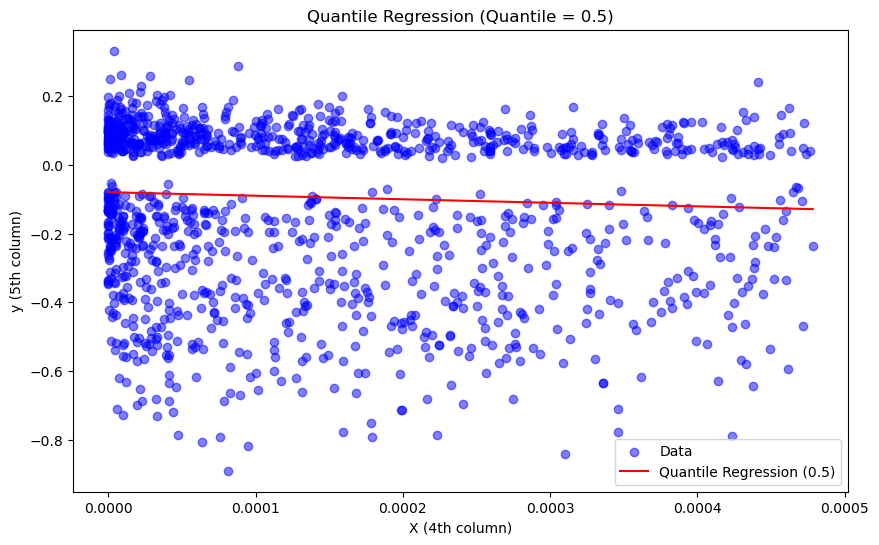

In [17]:
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
data = pd.read_csv(csvfilePath)

X = data.iloc[:, 4]
y = data.iloc[:, 5]

X = pd.to_numeric(X, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

# Combine and drop NaNs to sync X and y
data_clean = pd.concat([X, y], axis=1).dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean)
plt.title('Boxplot of Selected Features to Detect Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Function to detect outliers using IQR protocols
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers in both columns
outliers_X = detect_outliers(data_clean.iloc[:, 0])
outliers_y = detect_outliers(data_clean.iloc[:, 1])

print("Outliers in X (column 4):")
print(outliers_X)

print("Outliers in y (column 5):")
print(outliers_y)

# Extract cleaned data without outliers
data_no_outliers = data_clean[(~data_clean.iloc[:, 0].isin(outliers_X)) & (~data_clean.iloc[:, 1].isin(outliers_y))]

# Extract cleaned data
X_clean = data_no_outliers.iloc[:, 0]
y_clean = data_no_outliers.iloc[:, 1]

# Add a constants to the model
X_clean = sm.add_constant(X_clean)

# Fit the quantile regression model
quantile = 0.5
model = sm.QuantReg(y_clean, X_clean)
res = model.fit(q=quantile)

# Print the summary of the model
print(res.summary())

# Scatter plot with quantile regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_clean.iloc[:, 1], y_clean, color='blue', alpha=0.5, label='Data')

# Predict using the fitted model
X_fit = np.linspace(X_clean.iloc[:, 1].min(), X_clean.iloc[:, 1].max(), 100)
X_fit_with_const = sm.add_constant(X_fit)
y_fit = res.predict(X_fit_with_const)

plt.plot(X_fit, y_fit, color='red', label='Quantile Regression (0.5)')


plt.xlabel('X (4th column)')
plt.ylabel('y (5th column)')
plt.title('Quantile Regression (Quantile = 0.5)')
plt.legend()
#
plt.show()
#need to double chekc box plot for outlier identification 


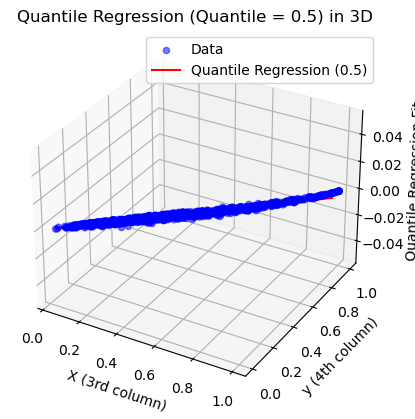

In [18]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data (assuming it was loaded earlier in your example)
csvfilePath = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S7 - S7.csv'
data = pd.read_csv(csvfilePath)

# Extracting X and y columns and cleaning the data
X = data.iloc[:, 2] 
y = data.iloc[:, 3]  

X = pd.to_numeric(X, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

data_clean = pd.concat([X, y], axis=1).dropna()

X_clean = data_clean.iloc[:, 0]
y_clean = data_clean.iloc[:, 1]

# Adding constant to X for the regression
X_clean = sm.add_constant(X_clean)

# Quantile regression at quantile = 0.5
quantile = 0.5
model = sm.QuantReg(y_clean, X_clean)
res = model.fit(q=quantile)

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(X_clean.iloc[:, 1], y_clean, c='blue', alpha=0.5, label='Data')

# Create a range for X values to plot the regression line
X_fit = np.linspace(X_clean.iloc[:, 1].min(), X_clean.iloc[:, 1].max(), 100)
X_fit_with_const = sm.add_constant(X_fit)
y_fit = res.predict(X_fit_with_const)

# Plot the regression line as a 3D surface (X, y_fit, and constant Z)
ax.plot(X_fit, y_fit, zs=0, zdir='z', color='red', label='Quantile Regression (0.5)')

# Set labels for the axes
ax.set_xlabel('X (3rd column)')
ax.set_ylabel('y (4th column)')
ax.set_zlabel('Quantile Regression Fit')

# Set title
ax.set_title('Quantile Regression (Quantile = 0.5) in 3D')

# Show the legend
ax.legend()

# Display the plot
plt.show()


# neeed to un impliment any lasso regression 
# refer to UNIPLOT as well need to find API for this 

New info given will add into the the documenttion